## Medical Insurance Cost dataset.

## MEDICAL COST ANALYSIS

1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats


2. Load Dataset

In [2]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. Basic Info & Summary

In [3]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Feature Datatypes (Medical Insurance Dataset)

age – Numerical (discrete)

sex – Categorical (nominal)

bmi – Numerical (continuous)

children – Numerical (discrete)

smoker – Categorical (nominal)

region – Categorical (nominal)

charges – Numerical (continuous)

In [4]:
df.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

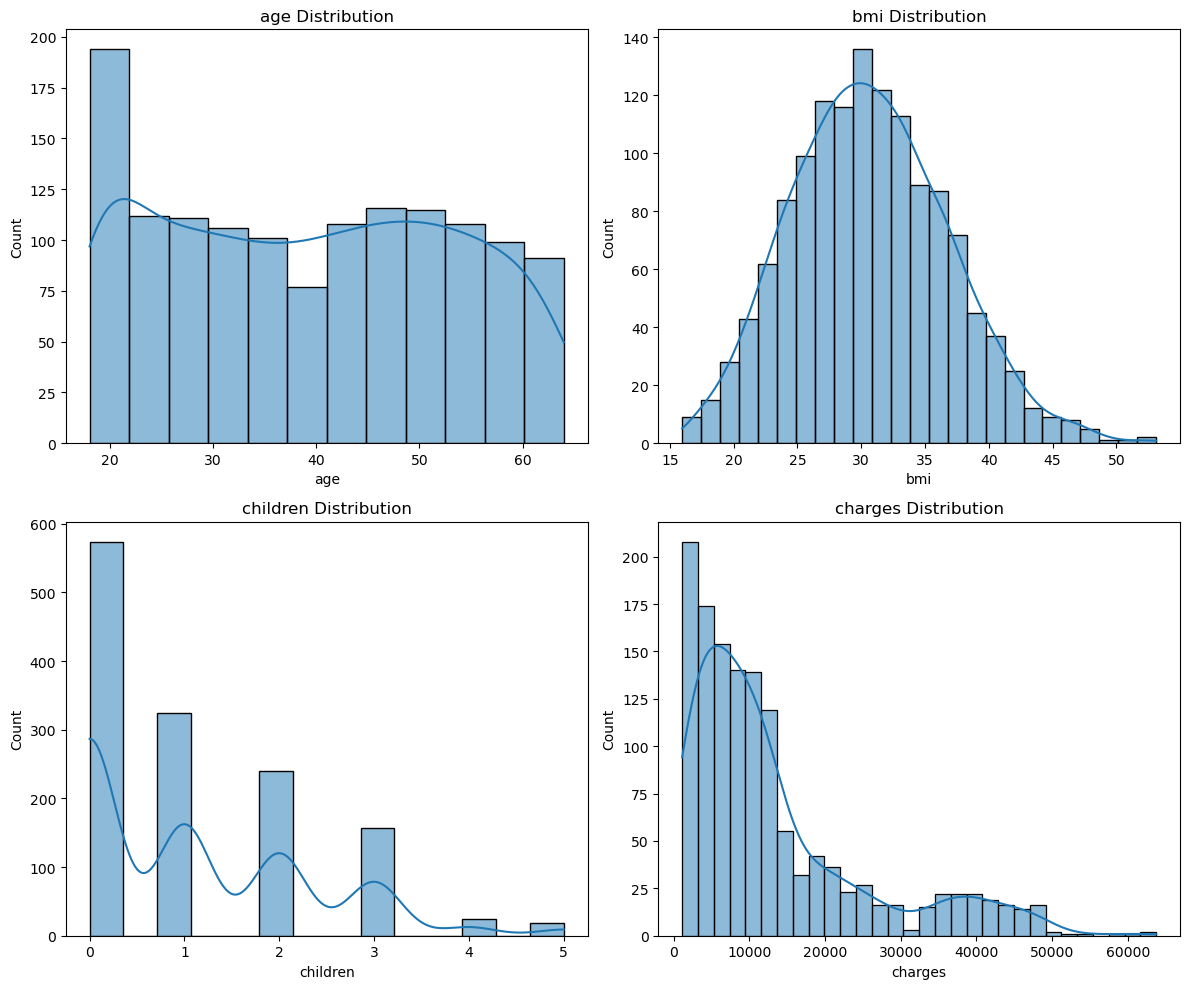

In [5]:
num_cols = ['age', 'bmi', 'children', 'charges']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title(f"{col} Distribution")

plt.tight_layout()
plt.show()


In [6]:
df[num_cols].skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

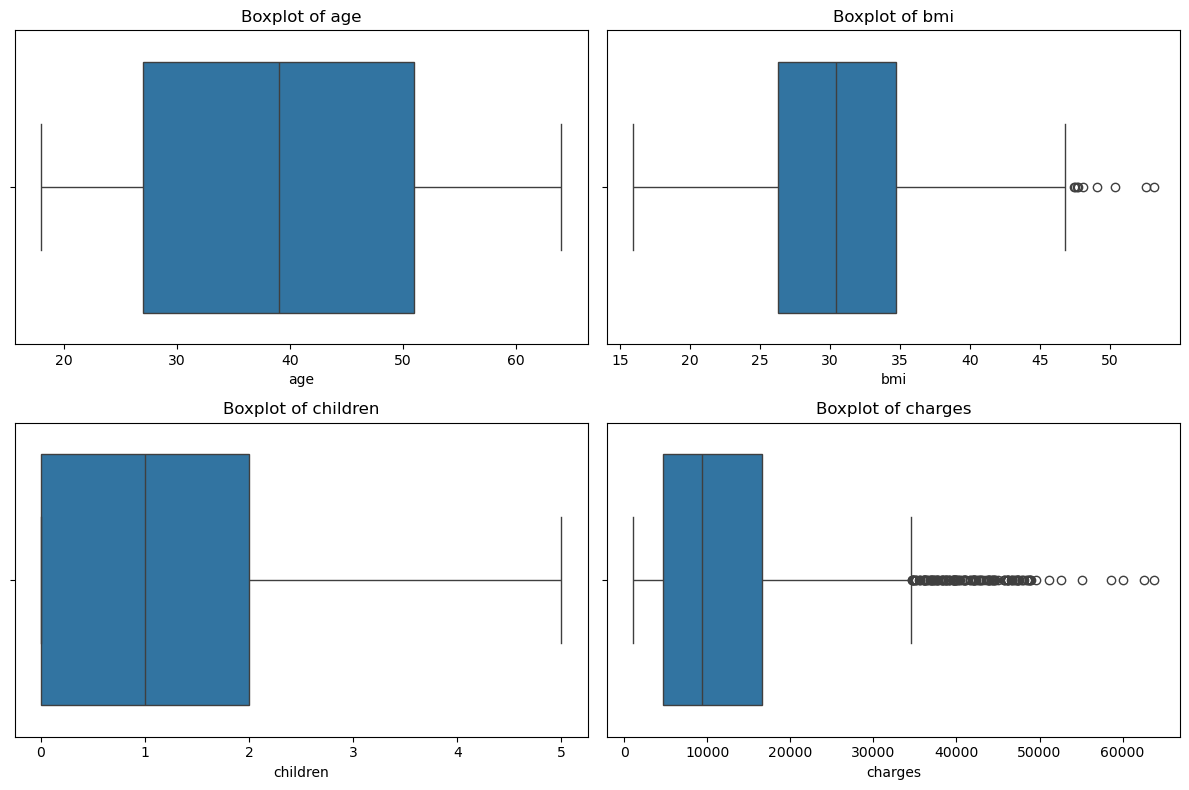

In [7]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

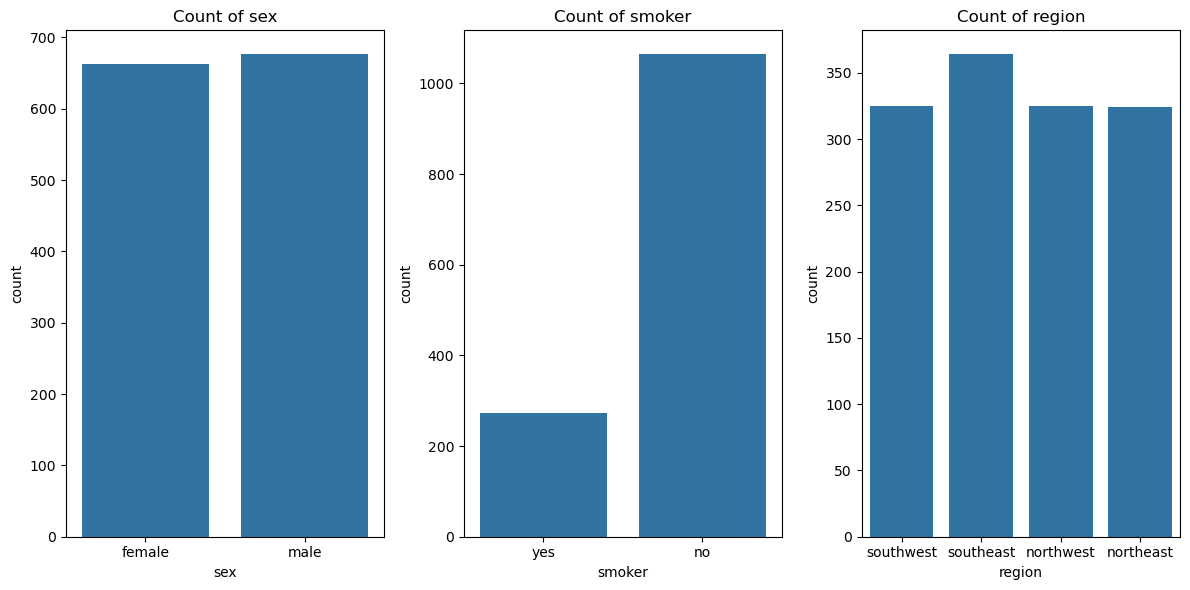

In [8]:
cat_cols = ["sex", "smoker", "region"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")

plt.tight_layout()
plt.show()

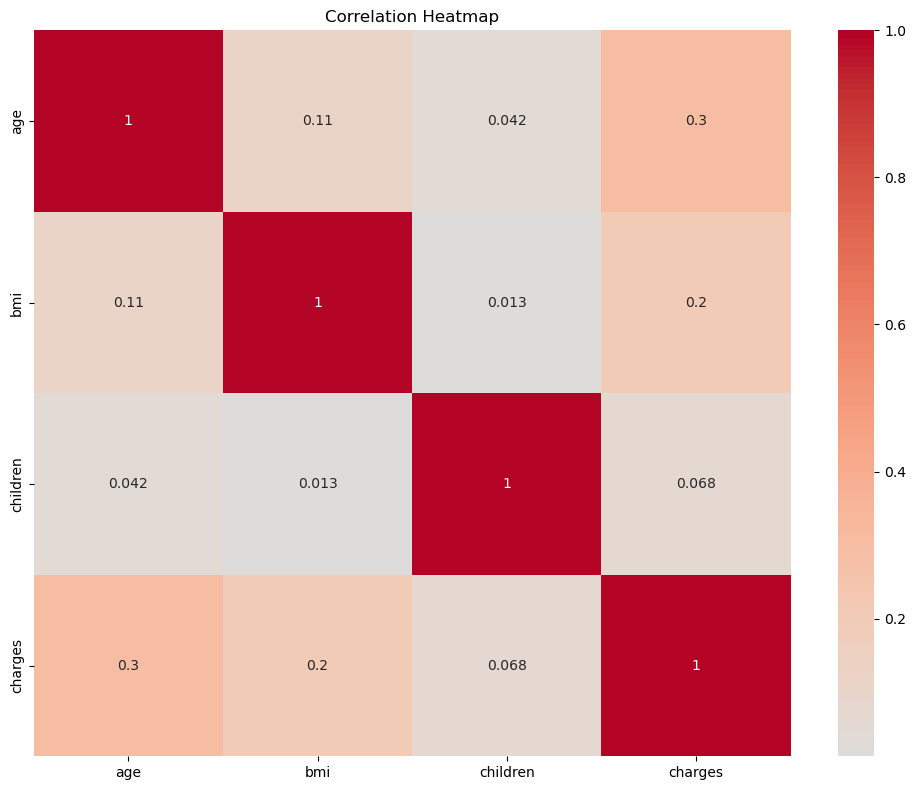

In [10]:


# use only numeric columns for correlation to avoid conversion errors from string columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

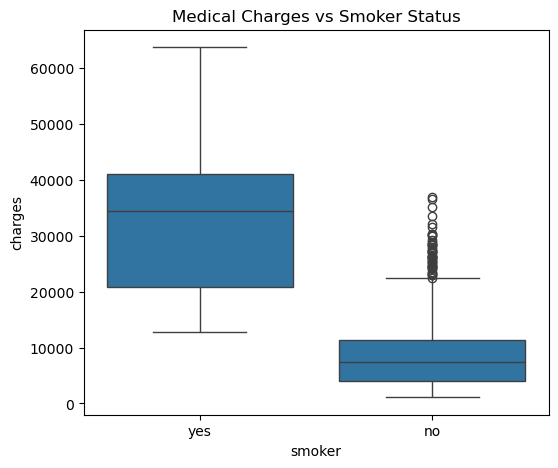

In [12]:
plt.figure(figsize=(6,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Medical Charges vs Smoker Status")
plt.show()



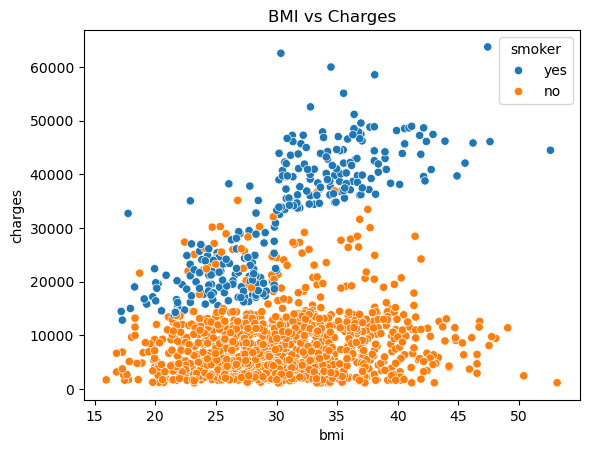

In [13]:
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title("BMI vs Charges")
plt.show()


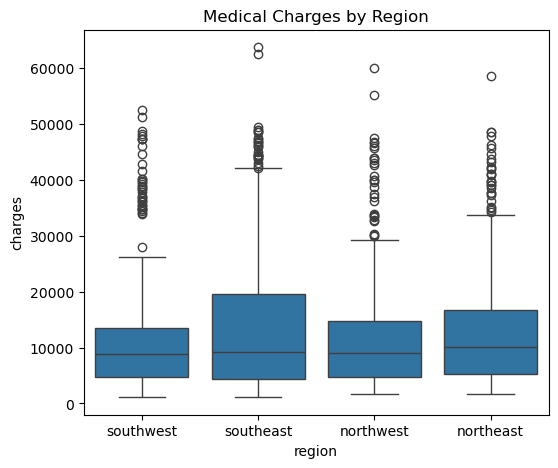

In [14]:
plt.figure(figsize=(6,5))
sns.boxplot(x='region', y='charges', data=df)
plt.title("Medical Charges by Region")
plt.show()


In [15]:
smokers = df[df['smoker']=='yes']['charges']
nonsmokers = df[df['smoker']=='no']['charges']

t_stat, p_val = stats.ttest_ind(smokers, nonsmokers)
print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: 46.66492117272371
P-value: 8.271435842179102e-283


In [16]:
cont_table = pd.crosstab(df['sex'], df['smoker'])
chi_stat, p, dof, exp = stats.chi2_contingency(cont_table)

print("Chi-square statistic:", chi_stat)
print("P-value:", p)


Chi-square statistic: 7.39291081459996
P-value: 0.006548143503580696


In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
